In [1]:
%matplotlib inline

from matplotlib.pyplot import subplots, savefig
import richardsplot as rplot

from utilities.analysis import pixellc, plotting
from utilities.ccd import CCD
from utilities.containers import *
from utilities.conversions import magToFlux

/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/astropy/table/np_utils.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _np_utils
/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/astropy/io/ascii/fastbasic.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import cparser
/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap

In [15]:
def create_and_save_pixel_maps(gen):
    
    ccd = gen.ccd
    flux_range = map(magToFlux,(50,1))
    lc = pixellc.get_pixel_lc(gen, percentiles)
    #lc = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)

    
    #Make the Full Image Map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Median Pixel Light Curves M{}.{}".format(ccd.module, ccd.channel),
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)
    #savefig('plots/c{:02d}/Module{}Channel{}PixelMapFull.png'.format(ccd.campaign, ccd.module, ccd.channel))
    
    #Make the differenced image map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          differenced=True, aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Differenced Median Pixel Light Curves M{}.{}".format(ccd.module, ccd.channel),
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)
    #savefig('plots/c{:02d}/Module{}Channel{}PixelMapDiff.png'.format(ccd.campaign, ccd.module, ccd.channel))
    

#make sure path "./plots/c##" exists to save Pixel Map figure
!mkdir plots/c16/

## an HDF5 File with all the pixel data from the campaign is needed
contact jmoreno3663@gmail.com for the files

In [8]:
pixmapfile = "/media/jackeline/UUI/PixelMaps/K2_target_pixels.hdf5"

#  Loop through

In [10]:
#pixmapfile = 'K2PixelMap_Camp8_Mod6_Chan2.hdf5'
percentiles = np.linspace(0, 100, 501)

#campaigns = range(6)
modules = range(25)
channels = range(4)

# For testing...
campaigns = [8]


for campaign in campaigns:
    
    if not os.path.isdir('plots/c{:02d}'.format(campaign)):
        os.mkdir('plots/c{:02d}'.format(campaign))
        
    for module in range(2,6):
        for channel in xrange(4):
            
            ccd = CCD(module=module, channel=channel, field='FLUX', campaign=campaign)
            
            if os.path.isfile('plots/c{:02d}/Module{}Channel{}PixelMapFull.png'.format(ccd.campaign, ccd.module, ccd.channel)):
                continue
            try:
                cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
            except:
                try:
                    cont = PixelMapContainer(ccd)
                    cont.save(pixmapfile)
                except Exception as e:
                        print "Could not load data for CCD: {}".format(ccd)
                        print e.__repr__
                        continue
                        
            gen = PixMapGenerator(cont)
            print "Making", ccd
            create_and_save_pixel_maps(gen)

Could not load data for CCD: CCD(module=3, channel=0, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f9f4c964f80>
Could not load data for CCD: CCD(module=3, channel=1, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f9f4c8d9098>
Could not load data for CCD: CCD(module=3, channel=2, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f9f4c8d90e0>
Could not load data for CCD: CCD(module=3, channel=3, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f9f4c8d9128>
Could not load data for CCD: CCD(module=5, channel=0, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f9f4c8d9170>
Could not load data for CCD: CCD(module=5, channel=1, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f9f4c8d91b8>
Could not load data for CCD: CCD(module=5, channel=2

# Single Chanel K2 Intensity Map of Systematics 

In [13]:
ccd = CCD(module=11, channel=3, field='FLUX', campaign=8)
            

cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)

                       
gen = PixMapGenerator(cont)
print "Making", ccd
            

Making CCD(module=11, channel=3, field='FLUX', campaign=8)


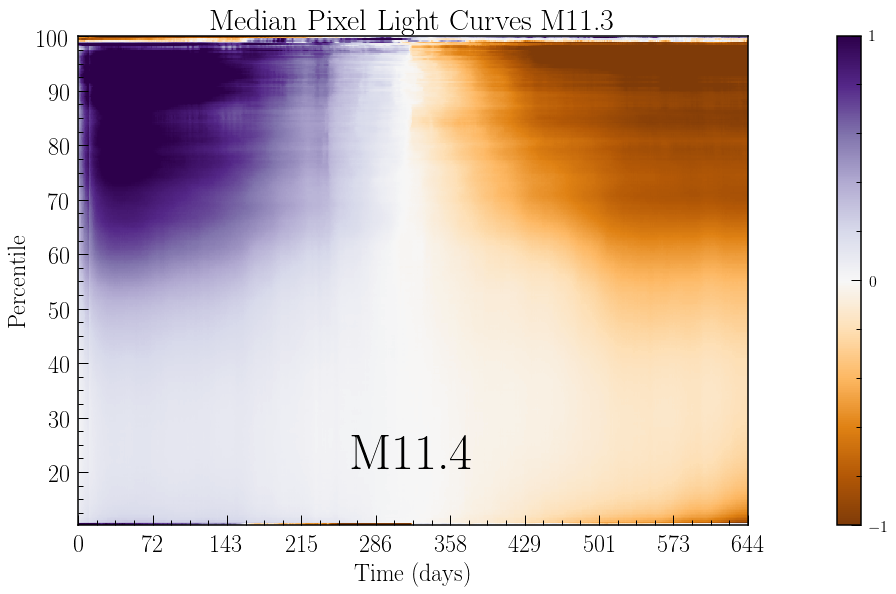

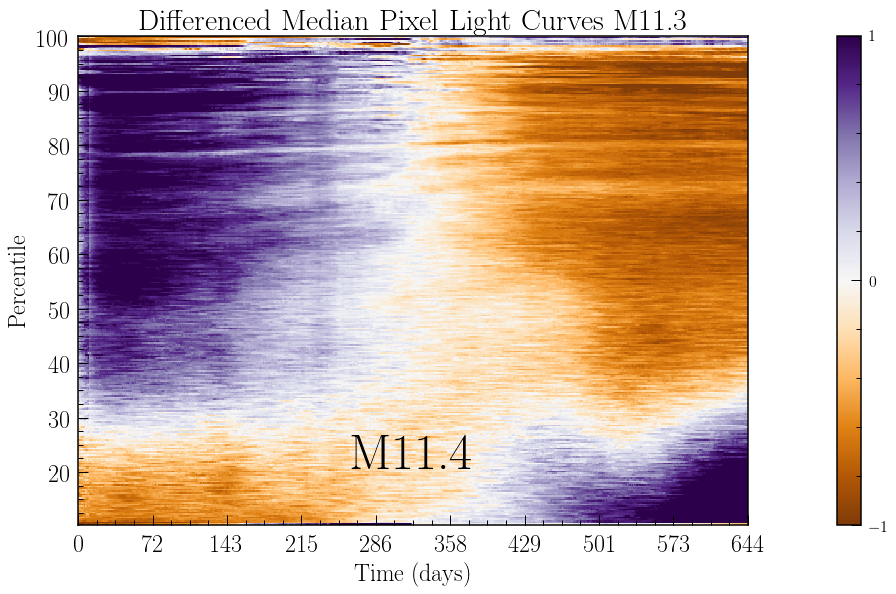

In [16]:
percentiles = np.linspace(0, 100, 300)
create_and_save_pixel_maps(gen)